In [9]:
from autograd import Value
import matplotlib.pyplot as plt
%matplotlib inline
import math
from nn import Linear, Module

100


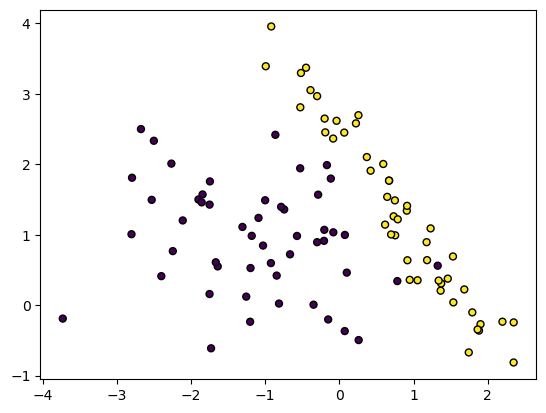

In [2]:
# 100x2 * 2x4
from sklearn.datasets import make_classification
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state = 15
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
print(len(X1))

In [3]:
class SimpleNN(Module):
    def __init__(self, input_size, hidden_size, output_size):
        self.fc1 = Linear(input_size, hidden_size, activation='relu')
        self.fc2 = Linear(hidden_size, hidden_size, activation='relu')
        self.fc3 = Linear(hidden_size, hidden_size, activation='relu')
        self.fc4 = Linear(hidden_size, output_size, activation='sigmoid')
        self.layers = [self.fc1, self.fc2, self.fc3, self.fc4]
    def __call__(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x[0] if len(x) == 1 else x
    def parameters(self):
        p = []
        for l in self.layers:
            p.extend(l.parameters())
        return p

In [4]:
network = SimpleNN(2, 4, 1)

In [5]:
epochs = 200
lr = 1e-3
# Training loop
for epoch in range(epochs):
    epoch_loss = 0.0
    accuracies = []
    for i in range(len(X1)):
        x = X1[i]
        y = Y1[i]

        # Forward prop
        y_hat = network(x)
        # Calculate cross-entropy loss
        loss = -1.0 * (y * y_hat.log() + (1-y) * (1-y_hat).log())
        epoch_loss += loss.data
        # Setting grads to zero
        network.zero_grad()
        # Backprop
        loss.backward()
        # Updating weights
        for p in network.parameters():
            p.data = p.data-lr*p.grad
        accuracies.append(round(y_hat.data) == y)
    print(f"Epoch {epoch}, loss = {epoch_loss/len(X1)}, accuracy = {sum(accuracies)/len(accuracies)}")
    

            

Epoch 0, loss = 0.631225761851677, accuracy = 0.75
Epoch 1, loss = 0.6217836632636778, accuracy = 0.85
Epoch 2, loss = 0.612229002315032, accuracy = 0.85
Epoch 3, loss = 0.6026742580746854, accuracy = 0.85
Epoch 4, loss = 0.5932191558535805, accuracy = 0.85
Epoch 5, loss = 0.5838102050981486, accuracy = 0.85
Epoch 6, loss = 0.574406868525952, accuracy = 0.85
Epoch 7, loss = 0.5649290200710164, accuracy = 0.85
Epoch 8, loss = 0.5554040173463701, accuracy = 0.85
Epoch 9, loss = 0.5458905764397731, accuracy = 0.85
Epoch 10, loss = 0.5364603001062253, accuracy = 0.86
Epoch 11, loss = 0.5270404845432293, accuracy = 0.86
Epoch 12, loss = 0.5176554790111472, accuracy = 0.86
Epoch 13, loss = 0.50832505285604, accuracy = 0.86
Epoch 14, loss = 0.49913279618022116, accuracy = 0.86
Epoch 15, loss = 0.4901238967705877, accuracy = 0.86
Epoch 16, loss = 0.481323120127902, accuracy = 0.86
Epoch 17, loss = 0.47266183130216954, accuracy = 0.87
Epoch 18, loss = 0.4641534560469467, accuracy = 0.88
Epoch 1

In [7]:
def plot_diagram(xs, ys):
    y_preds = [network(x).data > 0.5 for x in xs]
    print(len(y_preds))
    plt.figure(figsize=(10, 4))    
    plt.subplot(1,2,1)
    plt.title("Real classification")
    plt.scatter(xs[:, 0], xs[:, 1], marker="o", c=ys, s=25, edgecolor="k")
    plt.subplot(1,2,2)
    plt.title("Model classification")
    plt.scatter(xs[:, 0], xs[:, 1], marker="o", c=y_preds, s=25, edgecolor="k")

100


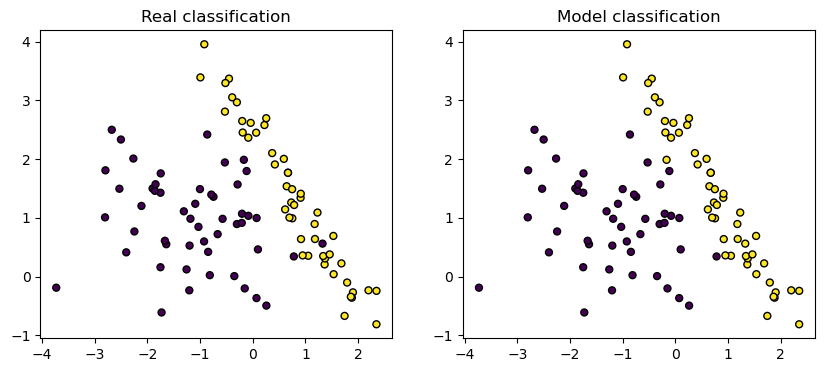

In [8]:
plot_diagram(X1[:100], Y1[:100])